# Решение СЛАУ методом Гаусса

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Невязка
def residual(A, X, F):
    return np.linalg.norm(np.dot(A,X) - F)

In [3]:
# Перестановка строк
# params: mod = {'Gauss', 'Gauss_max'}

def permutation(A, F, index, mod='Gauss'):
    prev_index = index
    
    try:
        if mod == 'Gauss':
            while A[index, prev_index] == 0 and index + 1 != A.shape[0]:
                index += 1
        elif mod == 'Gauss_max':
            index = np.nanargmax(np.where(A != 0, np.abs(A), np.NaN)[prev_index:, prev_index], axis=0) + prev_index
            
    except ValueError as error:
        pass
    
    if A[index, prev_index] != 0:
        A_i = np.array(A[index, :])
        F_i = np.array(F[index, :])

        A[index, :] = np.array(A[prev_index, :])
        F[index, :] = np.array(F[prev_index, :])

        A[prev_index, :] = A_i
        F[prev_index, :] = F_i

        return A, F, 1
    
    elif prev_index == 0:
        raise ValueError('Система уравнений не имеет решения')
    
    return A, F, 0

In [4]:
# Решение СЛАУ
# params: mod = {'Gauss', 'Gauss_max'}

def solve_SLE(A, F, mod='Gauss'):
    n = A.shape[0]
    A_copy = np.array(A)
    F_copy = np.array(F)
    
    # Приведение к диагональному виду
    for i in range(1, n):
        for j in range(i, n):
            A_copy, F_copy, flag = permutation(A_copy, F_copy, i - 1, mod)

            if flag:
                F_copy[j, 0] = F_copy[j, 0] - (A_copy[j, i - 1] / A_copy[i - 1, i - 1]) * F_copy[i - 1, 0]
                A_copy[j, :] = A_copy[j, :] - (A_copy[j, i - 1] / A_copy[i - 1, i - 1]) * A_copy[i - 1, :]

    #  Метод прогонки
#     print(A_copy[n - 2 : n, :])
#     print()
    
    X = np.zeros((n, 1))
    X[n - 1, 0] = F_copy[n - 1, 0] / A_copy[n - 1, n - 1]   

    for k in range(n - 2, -1, -1):
        amount = 0
        for j in range(k + 1, n):
            amount += X[j, 0] * A_copy[k, j]

        X[k, 0] = (F_copy[k, 0] - amount) / A_copy[k, k]

    return X

## Исходные данные

In [5]:
n = 100

In [6]:
A = np.zeros((n, n))
F = np.zeros(n).reshape((n, 1))

In [7]:
for i in range(n):
    A[i, :] = [random.random() * 10 for _ in range(n)]
    F[i, 0] = random.random() * 10

In [8]:
print('A = ', A, end='\n\n')
print('F = ', F, end='\n\n')

A =  [[6.05767182 8.37159134 3.44588171 ... 7.8869206  2.6297211  1.06354409]
 [0.25185128 9.55247937 3.85496024 ... 5.96963181 7.75691386 2.99749061]
 [2.55841126 8.10837467 2.31647872 ... 9.10121565 1.84329397 5.21464958]
 ...
 [1.37679079 1.60228522 5.6800211  ... 8.86799057 5.25260416 8.37411038]
 [3.47105453 6.71948825 0.59674281 ... 9.74900473 5.04055024 4.15511455]
 [8.56303909 9.03062541 1.39830497 ... 1.59049378 6.16883822 1.2649424 ]]

F =  [[4.5286781 ]
 [0.7059245 ]
 [4.41894968]
 [6.8178479 ]
 [8.27350485]
 [9.68517023]
 [7.72070204]
 [9.74702895]
 [1.44744002]
 [1.93857646]
 [0.75913516]
 [7.44130744]
 [7.85338361]
 [2.79143352]
 [4.63494409]
 [4.08131214]
 [2.20840864]
 [7.73404583]
 [0.72843722]
 [3.24536621]
 [7.92259369]
 [1.53554712]
 [0.64481259]
 [7.80156667]
 [8.10468358]
 [0.88192209]
 [6.00237128]
 [5.44653575]
 [9.36068922]
 [5.00780976]
 [7.84446273]
 [7.62871338]
 [5.3867878 ]
 [0.45642348]
 [7.29972907]
 [7.53305532]
 [6.05326268]
 [2.36923106]
 [2.34712666]

## Метод Гаусса

In [9]:
try:
    X = solve_SLE(A, F)
except ValueError as value_error:
    print(value_error)

In [10]:
residual(A, X, F)

2.8935363403794262e-11

## Метод Гаусса с выбором главного элемента

In [11]:
try:
    X = solve_SLE(A, F, mod='Gauss_max')
except ValueError as value_error:
    print(value_error)

In [12]:
residual(A, X, F)

6.027639957085003e-13

### Невязка

#### Зависимость от размерности системы

In [13]:
n_plot = []
rdual1_plot = []
rdual2_plot = []

n = 2

while n < 100:
    n_plot.append(n)
    
    A = np.zeros((n, n))
    F = np.zeros(n).reshape((n, 1))

    for i in range(n):
        A[i, :] = [random.random() * 10 for _ in range(n)]
        F[i, 0] = random.random() * 10
        
    X1 = solve_SLE(A, F)
    X2 = solve_SLE(A, F, mod='Gauss_max')
    
    rdual1_plot.append((residual(A, X1, F)))
    rdual2_plot.append((residual(A, X2, F)))
    n += 3

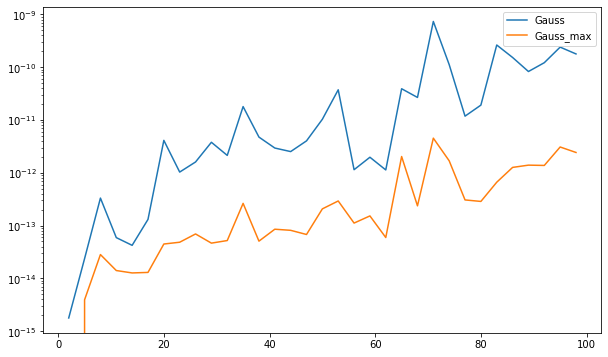

In [14]:
plt.figure(figsize=(10, 6))
plt.semilogy(n_plot, rdual1_plot, label='Gauss')
plt.semilogy(n_plot, rdual2_plot, label='Gauss_max')
plt.legend()

#### Зависимость от генерируемых значений

In [15]:
iter_plot = []
iterations = 2

rdual1_plot = []
rdual2_plot = []

n = 100

while iterations < 50:
    iter_plot.append(iterations)
    
    A = np.zeros((n, n))
    F = np.zeros(n).reshape((n, 1))

    for i in range(n):
        A[i, :] = [random.random() * 10 for _ in range(n)]
        F[i, 0] = random.random() * 10
        
    X1 = solve_SLE(A, F)
    X2 = solve_SLE(A, F, mod='Gauss_max')
    
    rdual1_plot.append(np.log(residual(A, X1, F)))
    rdual2_plot.append(np.log(residual(A, X2, F)))
    iterations += 1

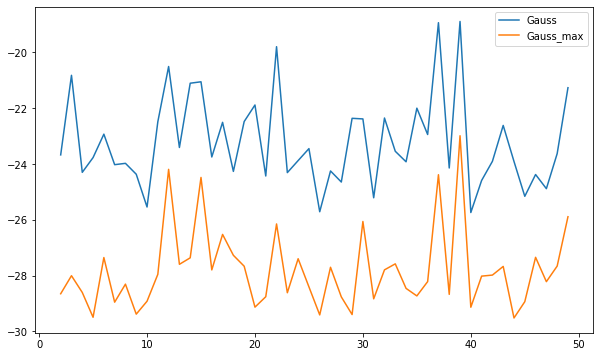

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(iter_plot, rdual1_plot, label='Gauss')
plt.plot(iter_plot, rdual2_plot, label='Gauss_max')
plt.legend()